<a href="https://colab.research.google.com/github/Alessandro-Castelli/Small-Project/blob/main/Dataset4A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import math
import os
from google.colab import files

In [4]:
#uploaded = files.upload()
# Load the dataset 4: 30 Years of European Solar Generation
# 1 row = 1 hour
# df4 = pd.read_csv(next(iter(uploaded)))
df4 = pd.read_csv("/content/EMHIRESPV_TSh_CF_Country_19862015.csv")

# Displays the first 5 rows of the dataset
print("------------------------------------------------------First 5 rows of the dataset---------------------------------------")
print(df4.head())

# General information about the dataset
print("------------------------------------------------General information about the dataset---------------------------------------")
print(df4.info())

# Descriptive statistics
print("------------------------------------------------Descriptive statistics------------------------------------------")
print(df4.describe())

# Counting unique values ​​for each column
print("------------------------------------------------Counting unique values ​​for each column---------------------------------------")
for col in df4.columns:
    print(f'{col}: {df4[col].nunique()} unique value')

# Study the correlation between the columns
print("-------------------------------------------------------Correlation-----------------------------------------------------")
df4_numerico = df4.select_dtypes(include=[np.number])
correlazione = df4_numerico.corr()
print(correlazione)

------------------------------------------------------First 5 rows of the dataset---------------------------------------
    AT   BE   BG   CH  CY   CZ   DE   DK   EE   ES  ...   LV   NL   NO   PL  \
0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    PT   RO   SI   SK   SE   UK  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 29 columns]
------------------------------------------------General information about the dataset---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26

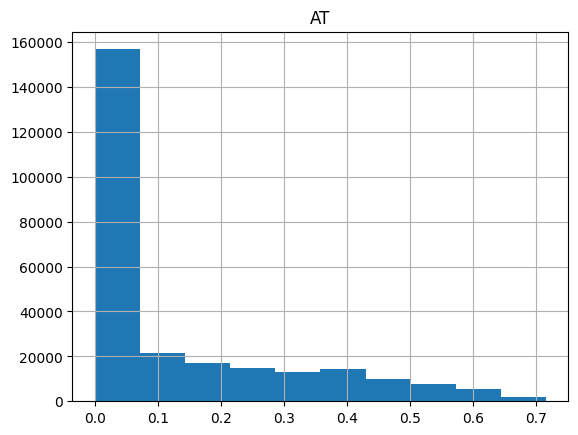

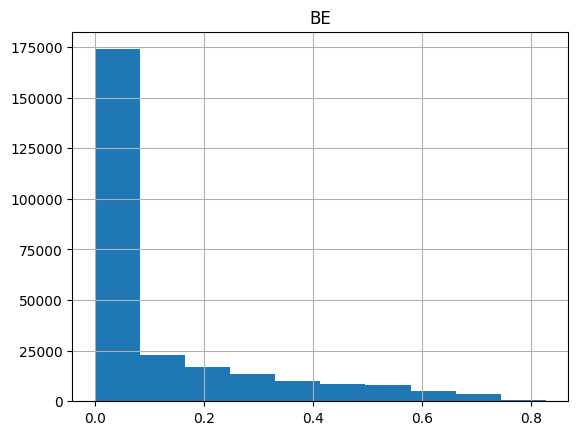

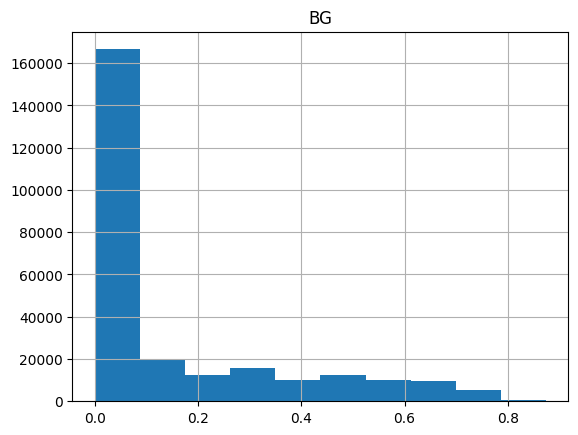

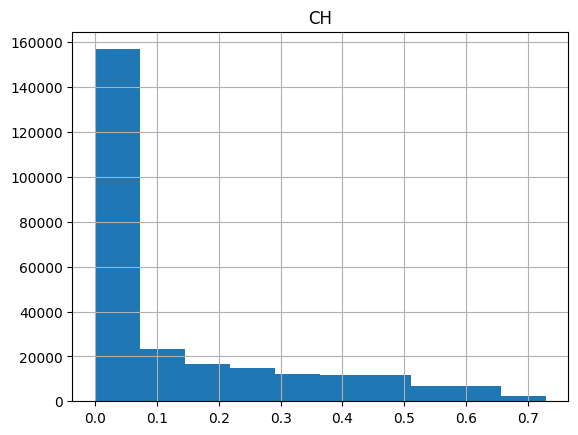

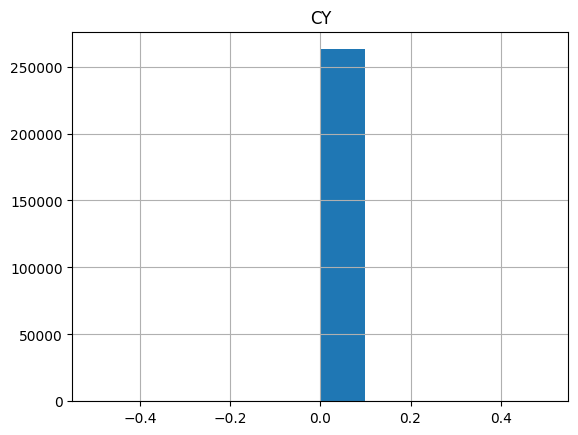

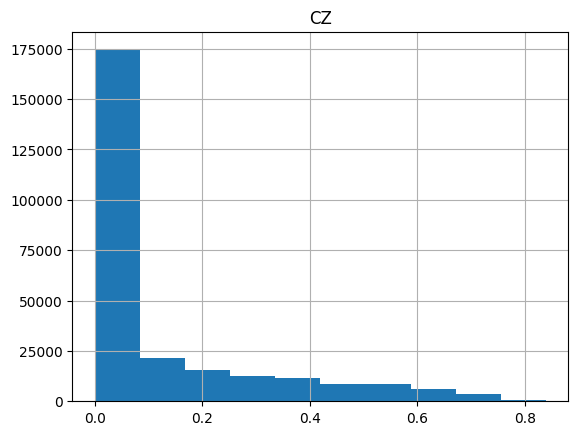

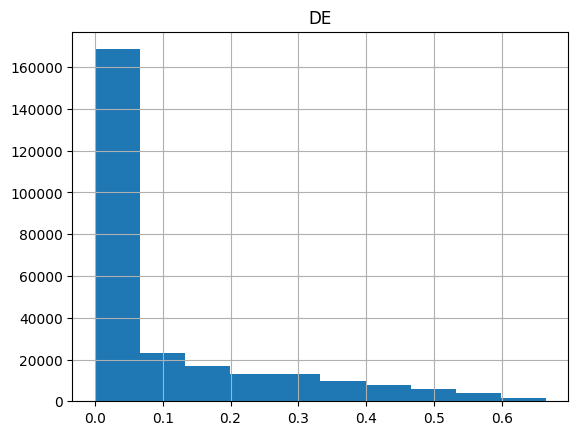

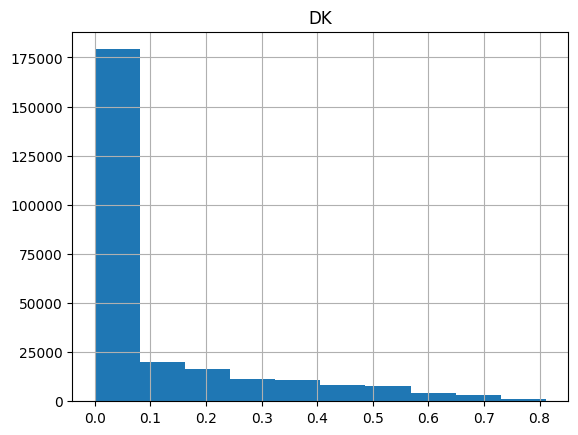

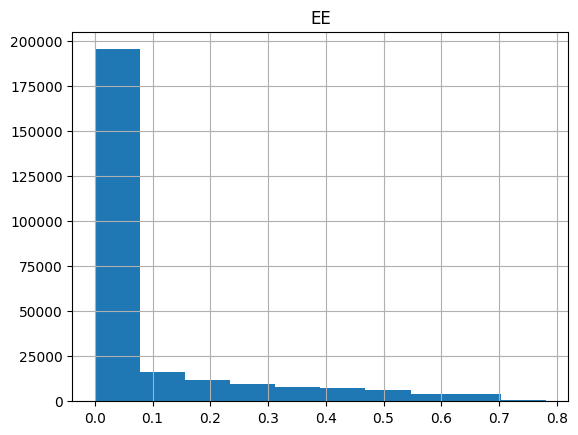

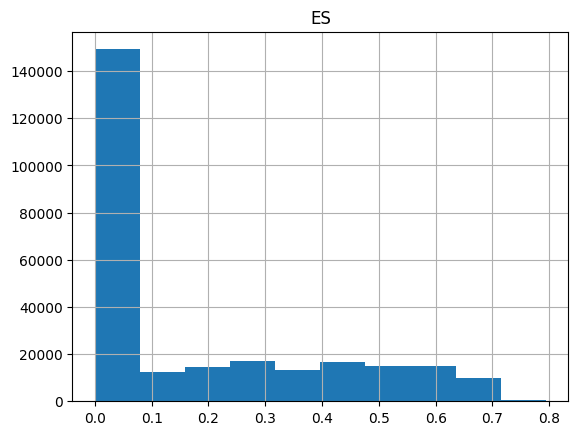

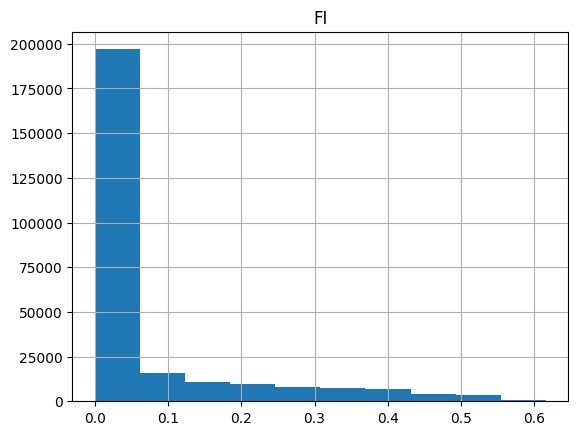

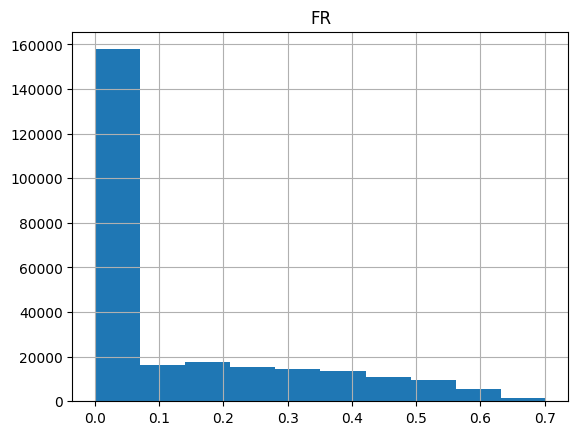

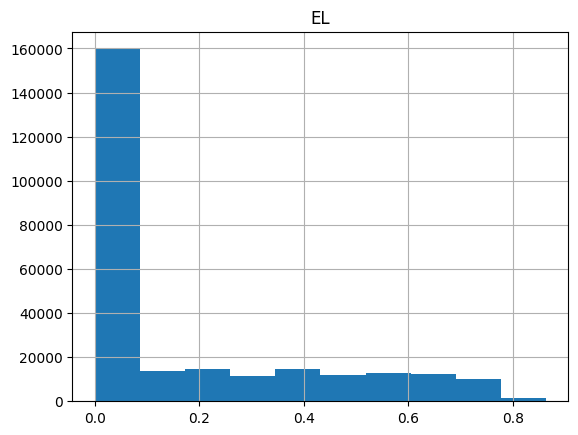

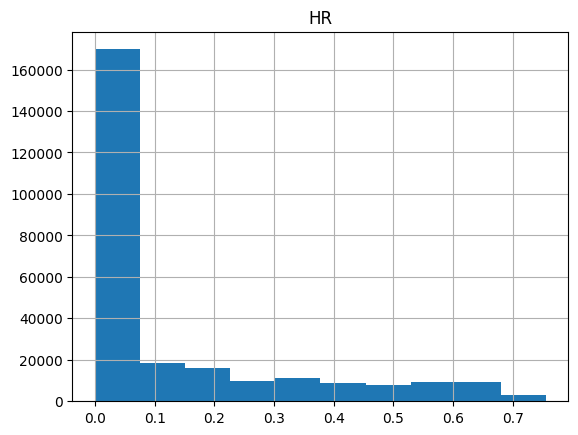

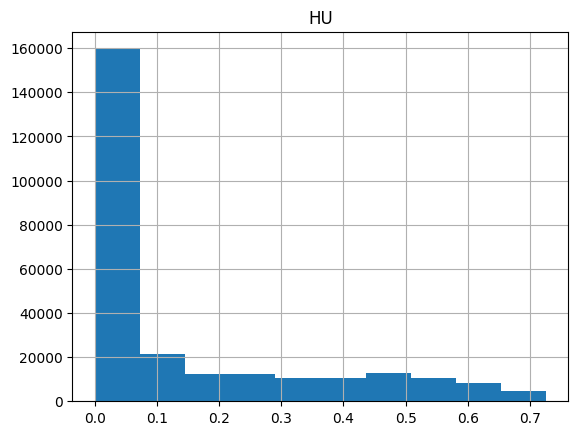

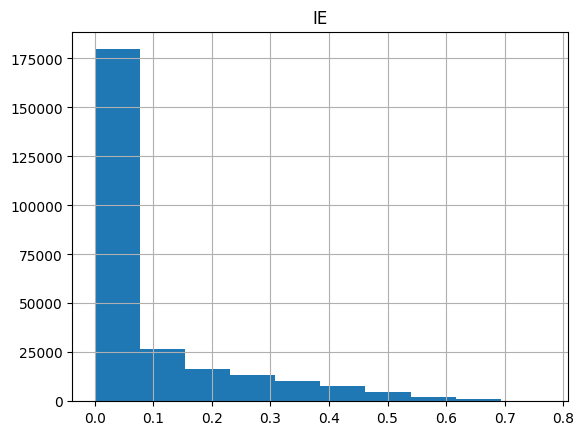

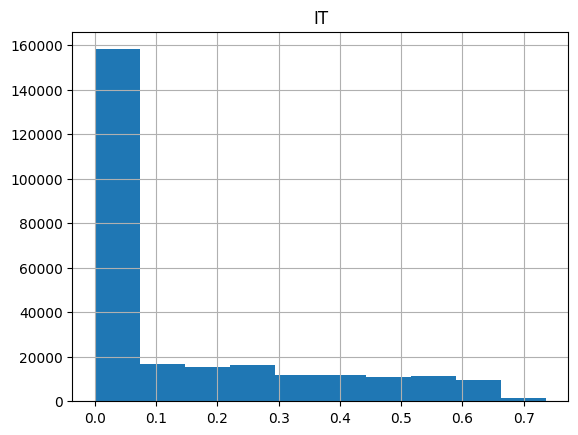

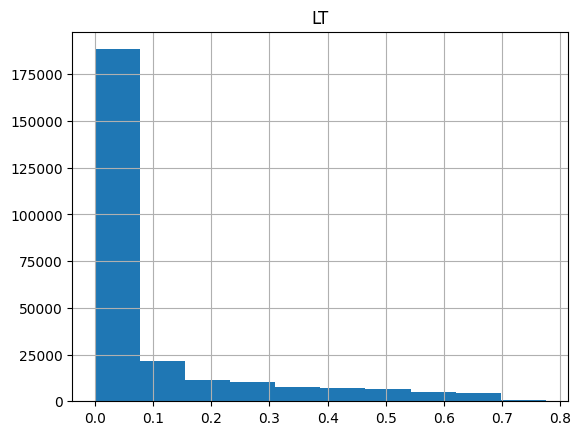

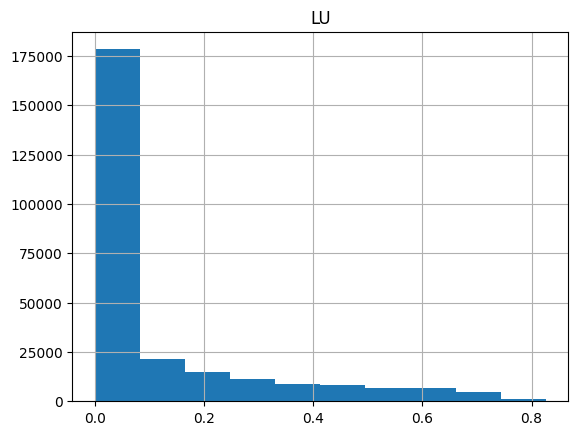

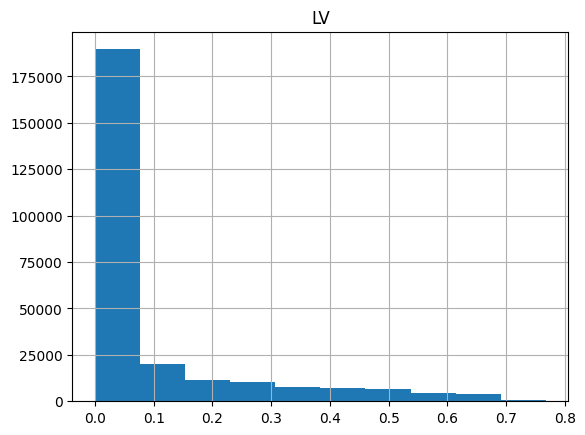

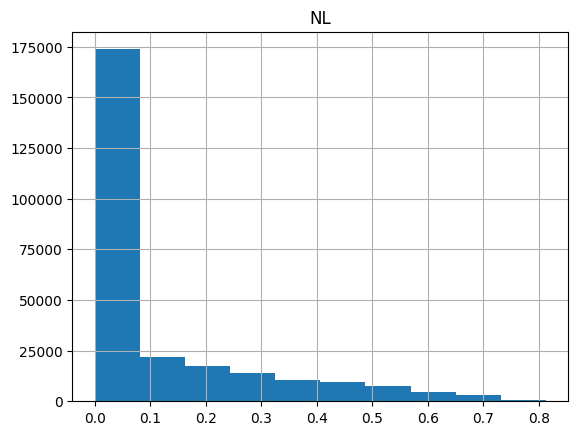

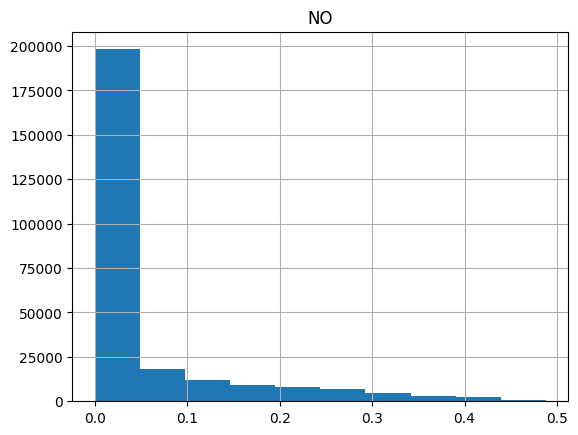

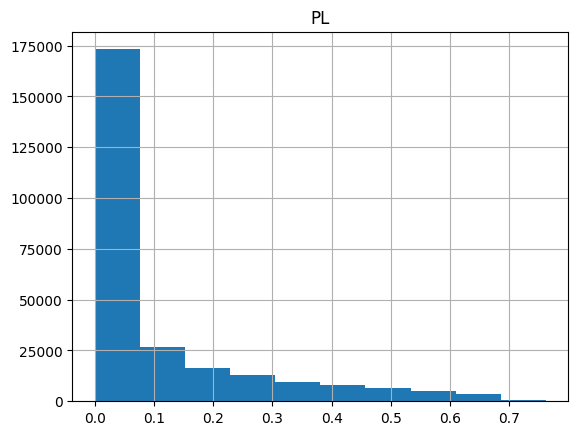

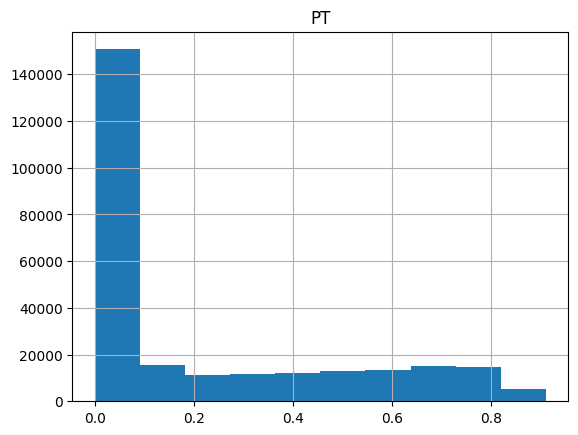

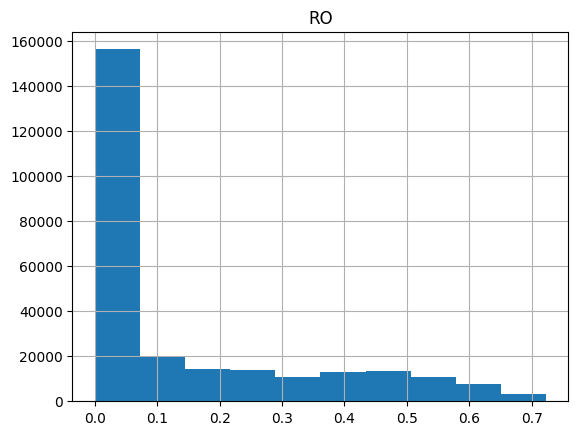

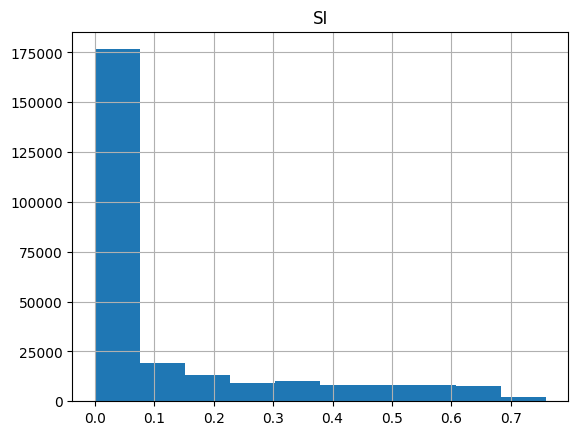

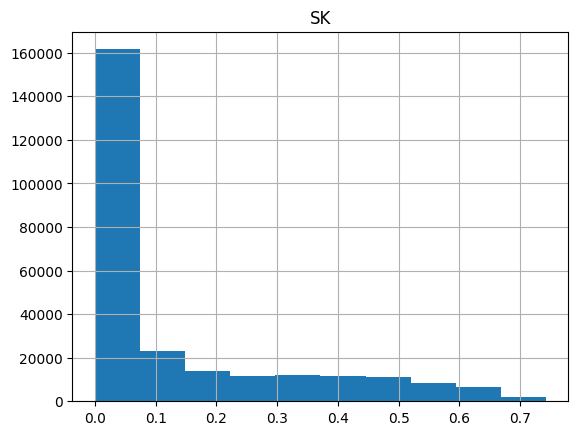

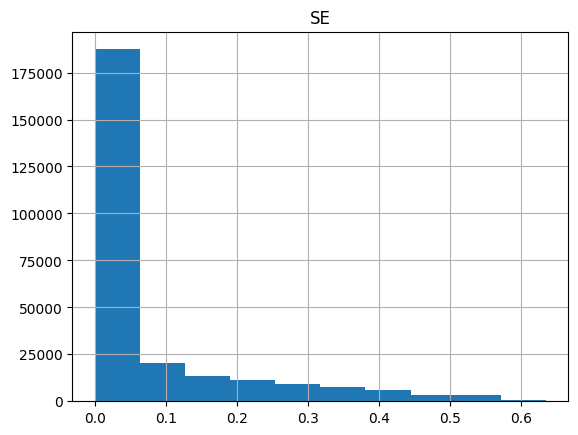

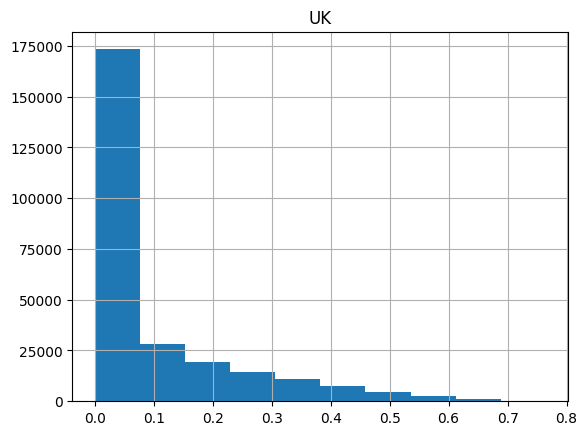

In [5]:
# Create a histogram for each column (each conutry)
for column in df4.columns:
    df4[column].hist()
    plt.title(column)
    plt.show()

-------------------------------------------Correlation Matrix-----------------------------------------


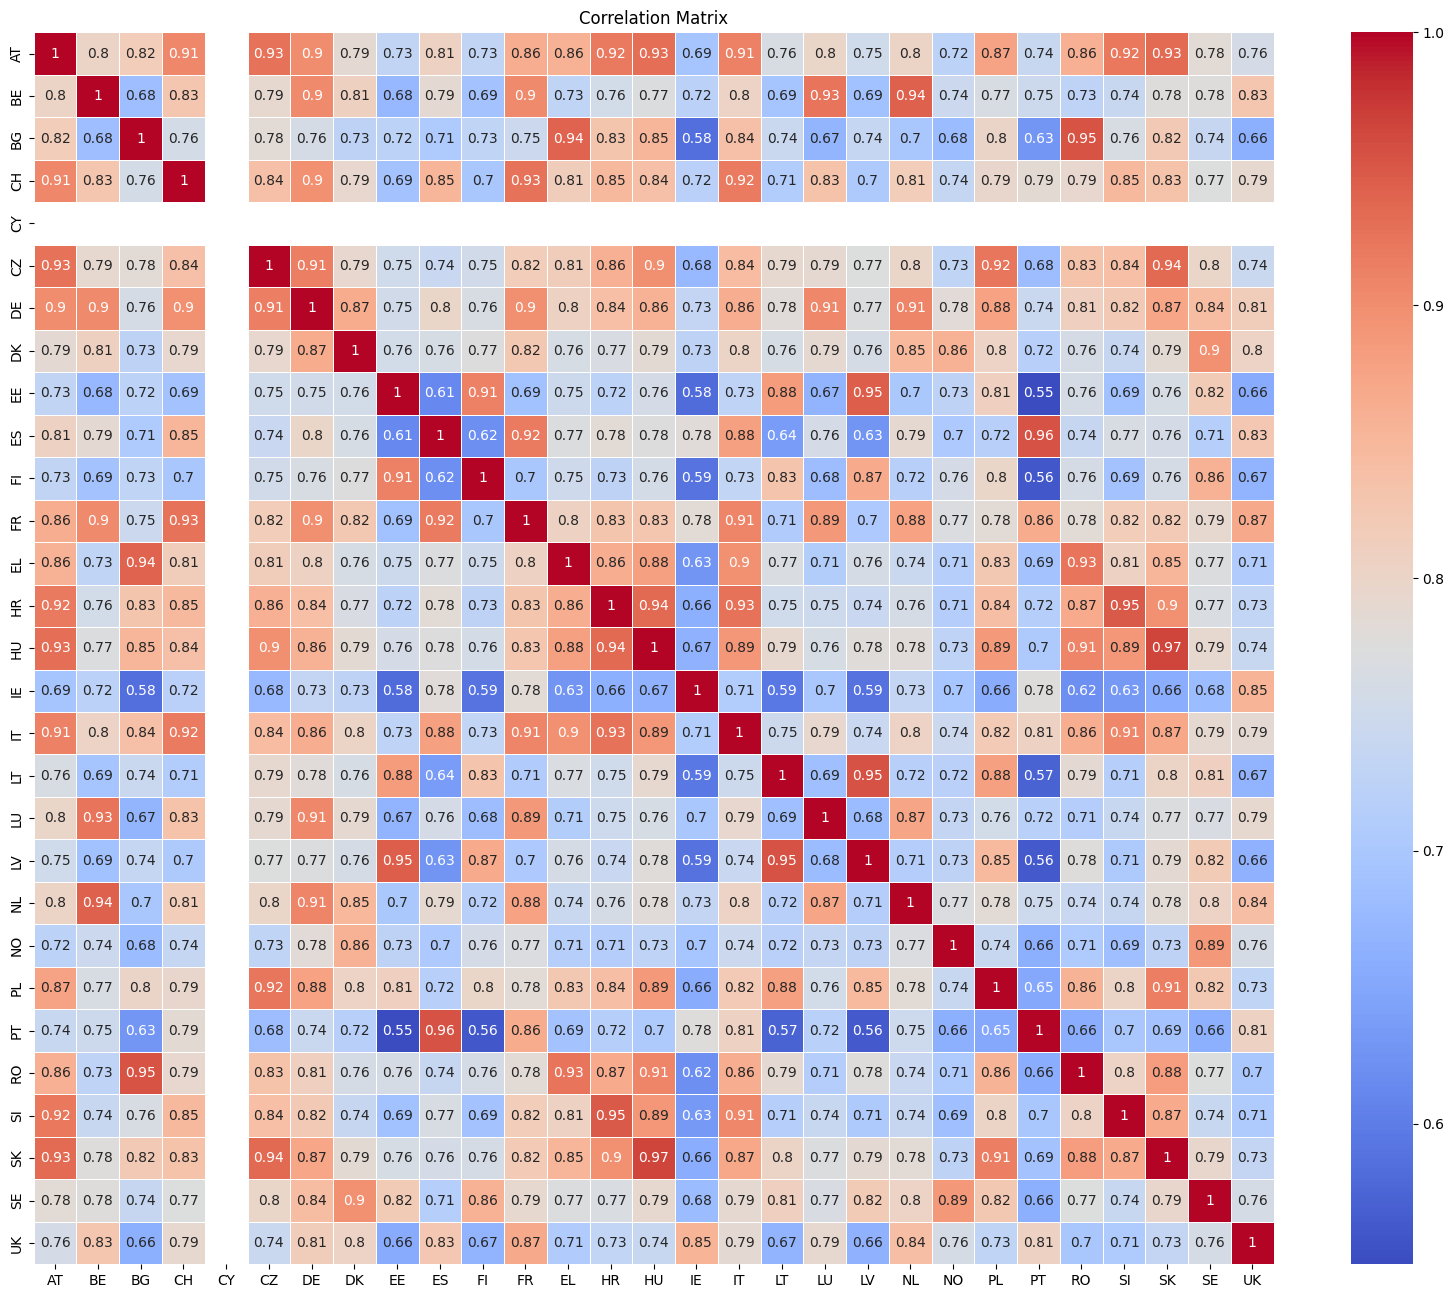

In [6]:
print("-------------------------------------------Correlation Matrix-----------------------------------------")
dfon4 = df4.select_dtypes(include=['number'])  # Only numerical columns
correlation_matrix = dfon4.corr()

plt.figure(figsize=(20, 16))  # Figure size

# Use seaborn to create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Title
plt.title('Correlation Matrix')

# Show
plt.show()

In order to understand the following section, please read the following.
Each row in the dataset represents the solar energy production for one hour. The dataset contains 262,968 rows, spanning a time period of approximately 30 years (from 1986 to 2015). By analyzing each column in the dataset, we can reconstruct the energy history of each country over a 30-year period

#How to interpret the acronyms?
 AT = AUSTRIA \\
 BE = BELGIUM \\
 BG = BULGARIA \\
 CH = SWITZERLAND \\
 CY = CYPRUS \\
 CZ = CZECH REPUBLIC \\
 DE = GERMANY \\
 DK = DENMARK \\
 EE = ESTONIA \\
 ES = SPAIN  \\
 FI = FINLAND \\
 FR = FRANCE \\
 EL = GREECE \\
 HR = CROATIA \\
 HU = HUNGARY \\
 IE = IRELAND \\
 IT = ITALY \\
 LT = LITHUANIA \\
 LU = LUXEMBURG \\
 LV = LATVIA \\
 NL = NETHERLANDS \\
 NO = NORWAY \\
 PL = POLAND \\
 PT = PORTUGAL \\
 RO = ROMANIA \\
 SI = SLOVENIA \\
 SK = SLOVAKIA \\
 SE = SWEDEN \\
 UK = UNITED KINGDOM



In [7]:
# Create a mini-dataset for each column.
mini_datasets = {}
for column in df4.columns:
    mini_datasets[column] = pd.DataFrame(df4[column])

total_entries = 262968

# Create a time index for 30 years, with a time unit of one hour each.
time_index = pd.date_range(start="01-01-1986", periods=total_entries, freq='H')

# The number of years covered by the dataset.
total_years = 30

# The number of rows per year.
entries_per_year = total_entries // total_years

# Create and display time series charts for each column with a year-wise breakdown.
for column, mini_dataset in mini_datasets.items():
    plt.figure(figsize=(50, 30))

    # Calculate the number of rows for each chart (year).
    rows = math.ceil(total_years / 2)
    columns = 2

    for year in range(total_years):
        plt.subplot(rows, columns, year + 1)
        start_idx = year * entries_per_year
        end_idx = (year + 1) * entries_per_year

        plt.plot(time_index[start_idx:end_idx], mini_dataset[start_idx:end_idx])
        plt.title(f"YEAR {year + 1}")
        plt.xlabel("TIME")
        plt.ylabel(column)
        plt.grid()

    plt.suptitle(f"TEMPORAL GRAPHICS: {column}")
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    #plt.show()
    output_directory = "/content/Table1"
    output_file = os.path.join(output_directory, f"{column}_temporal_graph.png")
    plt.savefig(output_file)

plt.close('all')

<ipython-input-7-93cf2d044a63>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(50, 30))


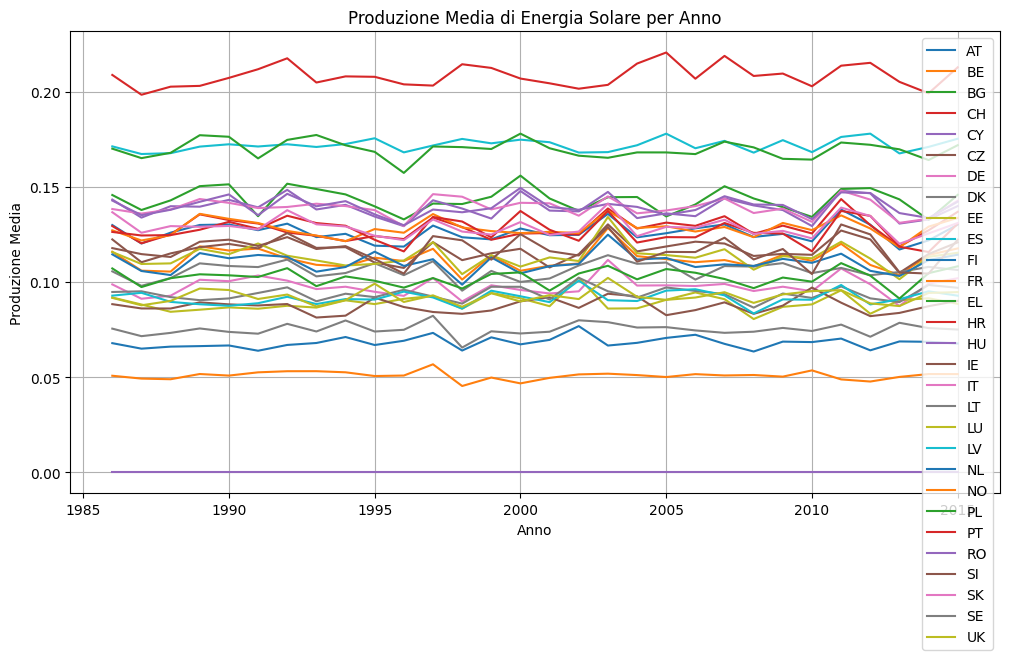

In [8]:
# Inizializza una lista per memorizzare i valori medi per ciascun anno
average_values = {column: [] for column in mini_datasets}

# Calcola i valori medi per ciascun anno
for year in range(total_years):
    start_idx = year * entries_per_year
    end_idx = (year + 1) * entries_per_year
    for column, mini_dataset in mini_datasets.items():
        yearly_data = mini_dataset[start_idx:end_idx]
        average_value = yearly_data.mean().values[0]
        average_values[column].append(average_value)

# Crea un grafico dei valori medi per ciascun anno
plt.figure(figsize=(12, 6))
for column, values in average_values.items():
    plt.plot(range(1986, 2016), values, label=column)

plt.title("Produzione Media di Energia Solare per Anno")
plt.xlabel("Anno")
plt.ylabel("Produzione Media")
plt.legend(loc="upper right")
plt.grid()

plt.show()


Medie per la colonna AT: [0.1262063997942686, 0.12565132342487478, 0.12661475174978246]
Medie per la colonna BE: [0.11226193593907857, 0.11218523959705802, 0.11202861124143991]
Medie per la colonna BG: [0.14487068703341266, 0.1420841293780016, 0.14283115294765286]
Medie per la colonna CH: [0.12693322366939988, 0.12815211984548117, 0.13005242461326283]
Medie per la colonna CY: [0.0, 0.0, 0.0]
Medie per la colonna CZ: [0.117587674720402, 0.11596253652836636, 0.11742405344030253]
Medie per la colonna DE: [0.09772620247769523, 0.09759234101580865, 0.09794521478759893]
Medie per la colonna DK: [0.10610625100897628, 0.10602770333359215, 0.10628915277985904]
Medie per la colonna EE: [0.0875519741820822, 0.09080983113776217, 0.08908892725374211]
Medie per la colonna ES: [0.17117846609741552, 0.1721854831280859, 0.17227770346309812]
Medie per la colonna FI: [0.06689871382232015, 0.0696611529192622, 0.06801099398658554]
Medie per la colonna FR: [0.12739714084795978, 0.12898115963545503, 0.128137

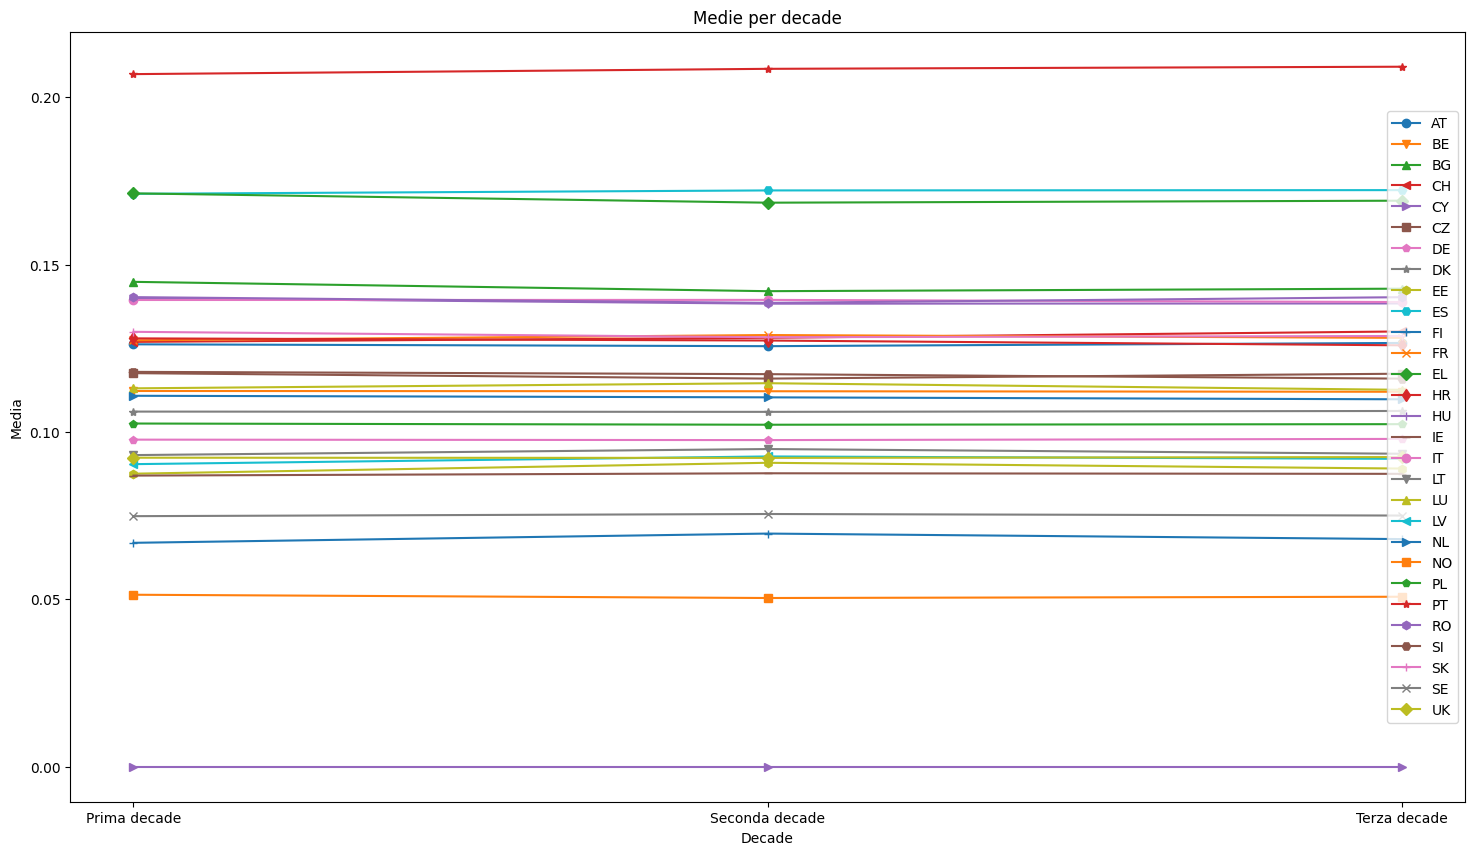

In [29]:
# Calcola la lunghezza di ogni terzo della colonna
terzo_len = len(df4) // 3

# Crea un dizionario vuoto per memorizzare i risultati
medie = {}

# Per ogni colonna nel DataFrame
for col in df4.columns:
    # Calcola la media per ogni terzo della colonna
    medie[col] = [
        df4[col][:terzo_len].mean(),
        df4[col][terzo_len:2*terzo_len].mean(),
        df4[col][2*terzo_len:].mean()
    ]

# Stampa le medie
for col, medie_terzi in medie.items():
    print(f"Medie per la colonna {col}: {medie_terzi}")



# Crea un array per l'asse x
decadi = ['Prima decade', 'Seconda decade', 'Terza decade']

# Crea una nuova figura
plt.figure(figsize=(18, 10))

# Crea un elenco di marcatori
marcatori = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

# Per ogni colonna nel dizionario delle medie
for i, (col, medie_terzi) in enumerate(medie.items()):
    # Crea un grafico a linee con le medie dei terzi
    plt.plot(decadi, medie_terzi, marker=marcatori[i % len(marcatori)], label=col)

# Imposta il titolo del grafico
plt.title('Medie per decade')

# Imposta le etichette degli assi
plt.xlabel('Decade')
plt.ylabel('Media')

# Imposta la legenda
plt.legend()

# Mostra il grafico
plt.show()
